##**Mapa provincial sobre la variación anual de la población**
Este cuaderno tiene como objetivo mostrar en un mapa la variación poblacional de las distintas provincias de España desde 1998 a 2021 con los datos del [Padrón municipal a 1 de enero](https://www.ine.es/jaxiT3/Tabla.htm?t=2918&L=0) que nos proporciona el INE.

En primer lugar vamos a mostrar los resultados relativos a 2021.

Para seleccionar los datos que se utilizan en el ejemplo, seleccionamos: 
- En Provincias seleccionamos todas menos Total
- En Tipo de dato seleccionamos Variación relativa
- En Periodo seleccionamos 2021

Se ha utilizado como documento base el cuaderno [*Cómo dibujar mapas en Python I Mapas estáticos*](https://github.com/AlejandroDGR/Proyecto_Difusion_Universitarios_INE/blob/master/Esquemas_Python/C%C3%B3mo%20dibujar%20mapas%20en%20Python%20I%20Mapas%20est%C3%A1ticos.ipynb), donde viene explicado como ir desarrollando un mapa estático. 

In [ ]:
# Cargamos la librerias que vamos a utilizar
import pandas as pd
!pip install geopandas
import geopandas as gpd
%matplotlib inline
import matplotlib.pyplot as plt

Seleccionamos el archivo de datos descargado anteriormente, al que hemos llamado ***VarPoblación21***, que se trata de un archivo csv separado por ;

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving VarPoblación21.csv to VarPoblación21.csv


In [ ]:
datos=pd.read_csv("VarPoblación21.csv", sep=";", decimal=",", engine="python",  encoding="latin-1")
datos.head()

,Provincias,Tipo de dato,Periodo,Total
0,02 Albacete,Variación relativa,2021,-0.47
1,03 Alicante/Alacant,Variación relativa,2021,0.10
2,04 Almería,Variación relativa,2021,0.53
3,01 Araba/Álava,Variación relativa,2021,-0.09
4,33 Asturias,Variación relativa,2021,-0.69


In [ ]:
# Importamos datos geográficos que actualmente se encuentran en nuestro repositorio de GitHub
canarias = gpd.read_file('https://github.com/AlejandroDGR/Proyecto_Difusion_Universitarios_INE/blob/master/mapas/canarias_provincias.zip?raw=true')
peninsula_baleares = gpd.read_file('https://github.com/AlejandroDGR/Proyecto_Difusion_Universitarios_INE/blob/master/mapas/peninsula_provincias.zip?raw=true')

Canarias_Acercadas = canarias
from shapely import affinity
Canarias_Acercadas["geometry"] = Canarias_Acercadas["geometry"].apply(affinity.translate, xoff=4.5, yoff=7) 

# Unimos los datos cartograficos
mapa = gpd.GeoDataFrame(pd.concat([peninsula_baleares, Canarias_Acercadas]))
mapa.head()

,INSPIREID,COUNTRY,NATLEV,NATLEVNAME,NATCODE,NAMEUNIT,CODNUT1,CODNUT2,CODNUT3,geometry
0,ES.IGN.BDDAE.34084500000,ES,https://inspire.ec.europa.eu/codelist/Administ...,Provincia,34084500000,Toledo,ES4,ES42,None,"POLYGON ((-5.40611 39.87773, -5.40618 39.87884..."
1,ES.IGN.BDDAE.34024400000,ES,https://inspire.ec.europa.eu/codelist/Administ...,Provincia,34024400000,Teruel,ES2,ES24,None,"POLYGON ((0.14136 40.71821, 0.12382 40.72081, ..."
2,ES.IGN.BDDAE.34094300000,ES,https://inspire.ec.europa.eu/codelist/Administ...,Provincia,34094300000,Tarragona,ES5,ES51,None,"MULTIPOLYGON (((0.70759 40.63522, 0.70732 40.6..."
3,ES.IGN.BDDAE.34074200000,ES,https://inspire.ec.europa.eu/codelist/Administ...,Provincia,34074200000,Soria,ES4,ES41,None,"POLYGON ((-1.99369 41.57709, -1.99311 41.57646..."
4,ES.IGN.BDDAE.34014100000,ES,https://inspire.ec.europa.eu/codelist/Administ...,Provincia,34014100000,Sevilla,ES6,ES61,None,"POLYGON ((-5.94134 36.85192, -5.94659 36.85232..."


In [ ]:
# Creamos una nueva columna que después añadiremos a nuestro DataFrame
mapa["Codigo"] = mapa["NATCODE"].str[4:6] #Para quedarnos con el código de la provincia
mapa[["NAMEUNIT", "NATCODE", "Codigo"]].head()

,NAMEUNIT,NATCODE,Codigo
0,Toledo,34084500000,45
1,Teruel,34024400000,44
2,Tarragona,34094300000,43
3,Soria,34074200000,42
4,Sevilla,34014100000,41


In [ ]:
# Cogemos el código de la provincia
datos["Codigo"] = datos["Provincias"].str[:2] 
datos = datos[["Codigo", "Provincias", "Total"]]
# Unimos nuestros DataFrame con un merge
mapa_inflacion = pd.merge(mapa, datos)
mapa_inflacion = mapa_inflacion[["NAMEUNIT", "Codigo", "Total", "geometry"]] 
# Renombramos la columna "NAMEUNIT" por "Provincia"
mapa_inflacion = mapa_inflacion.rename(columns={"NAMEUNIT":"Provincia"}) 
mapa_inflacion.head()

,Provincia,Codigo,Total,geometry
0,Toledo,45,0.80,"POLYGON ((-5.40611 39.87773, -5.40618 39.87884..."
1,Teruel,44,0.28,"POLYGON ((0.14136 40.71821, 0.12382 40.72081, ..."
2,Tarragona,43,0.68,"MULTIPOLYGON (((0.70759 40.63522, 0.70732 40.6..."
3,Soria,42,-0.15,"POLYGON ((-1.99369 41.57709, -1.99311 41.57646..."
4,Sevilla,41,-0.12,"POLYGON ((-5.94134 36.85192, -5.94659 36.85232..."


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

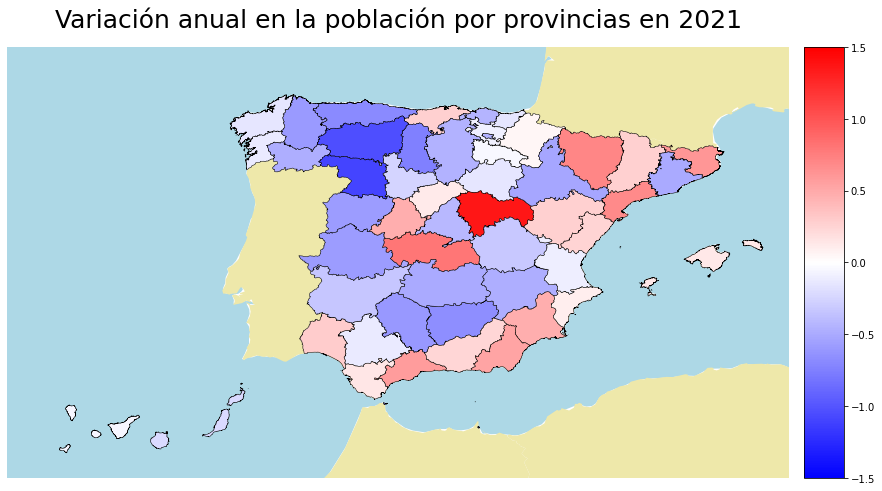

In [ ]:
# Creamos la figura y establecemos su tamaño
fig, ax = plt.subplots(1, 1, figsize=(15, 15))
 
# Establecemos las coordenadas geográficas a cartografiar
ax.axis([-15, 5, 34, 45]) 
 
# Título 
ax.set_title("Variación anual en la población por provincias en 2021", 
             pad = 20, #Eleva el título, separándolo del contorno de la figura
             fontdict={"fontsize":25}) 

# Eliminar ejes
ax.set_axis_off()

# Añadimos la leyenda separada del mapa
from mpl_toolkits.axes_grid1 import make_axes_locatable
divider = make_axes_locatable(ax)
cax = divider.append_axes("right",
                         size="5%",
                         pad=0.2) # Para separar la leyenda un poco del mapa

# Dibujamos nuestro mapa de provincias
mapa_inflacion.plot(ax=ax,
           column="Total",
           cmap="bwr", # Seleccionamos un Colormaps acorde a lo que queremos representar
           edgecolor="black",
           linewidth=0.5,
           legend=True,
           # Indicamos el número mínimo y máximo de nuestra leyenda acorde a los datos que tenemos
           norm=plt.Normalize(vmin=-1.5, vmax=1.5), 
           cax=cax,
           zorder=5); 

# Añadimos capa de mares al mapa
oceanos_file = r'https://github.com/AlejandroDGR/Proyecto_Difusion_Universitarios_INE/blob/master/mapas/oceanos.zip?raw=true'
mapa_oceanos = gpd.read_file(oceanos_file)#.to_crs("EPSG:3395")
mapa_oceanos.plot(ax=ax,
                 color="lightblue",
                 zorder=0);

# Añadimos capa de países
paises_file = r'https://github.com/AlejandroDGR/Proyecto_Difusion_Universitarios_INE/blob/master/mapas/paises.zip?raw=true'
mapa_paises = gpd.read_file(paises_file)#.to_crs("EPSG:3395")
mapa_paises.plot(ax=ax,
                 color="palegoldenrod",
                 linewidth=0,
                 zorder=2);

# Guardamos y nos descargamos el mapa en formato .png
plt.savefig("Mapa_Provincias_VarPoblación.png")
from google.colab import files
files.download("Mapa_Provincias_VarPoblación.png")

###**Comparación de mapas provinciales**
A continuación, vamos a mostrar los mapas provinciales de 2021 y 2020, para poder comparar la variación poblacional en ambos momentos del tiempo. 

Realizamos la misma selección de datos que anteriormente, pero en este caso para el año 2020.

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving VarPoblación20.csv to VarPoblación20.csv


In [ ]:
datos2=pd.read_csv("VarPoblación20.csv", sep=";", decimal=",", engine="python",  encoding="latin-1")
datos2.head()

,Provincias,Tipo de dato,Periodo,Total
0,02 Albacete,Variación relativa,2020,0.03
1,03 Alicante/Alacant,Variación relativa,2020,1.14
2,04 Almería,Variación relativa,2020,1.55
3,01 Araba/Álava,Variación relativa,2020,0.72
4,33 Asturias,Variación relativa,2020,-0.39


In [ ]:
datos2["Codigo"] = datos2["Provincias"].str[:2]
datos2 = datos2[["Codigo", "Provincias", "Total"]]

mapa_inflacion2 = pd.merge(mapa, datos2)
mapa_inflacion2 = mapa_inflacion2[["NAMEUNIT", "Codigo", "Total", "geometry"]] 
mapa_inflacion2 = mapa_inflacion2.rename(columns={"NAMEUNIT":"Provincia"}) 
mapa_inflacion2.head()

,Provincia,Codigo,Total,geometry
0,Toledo,45,1.28,"POLYGON ((-5.40611 39.87773, -5.40618 39.87884..."
1,Teruel,44,0.03,"POLYGON ((0.14136 40.71821, 0.12382 40.72081, ..."
2,Tarragona,43,1.50,"MULTIPOLYGON (((0.70759 40.63522, 0.70732 40.6..."
3,Soria,42,0.28,"POLYGON ((-1.99369 41.57709, -1.99311 41.57646..."
4,Sevilla,41,0.40,"POLYGON ((-5.94134 36.85192, -5.94659 36.85232..."


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

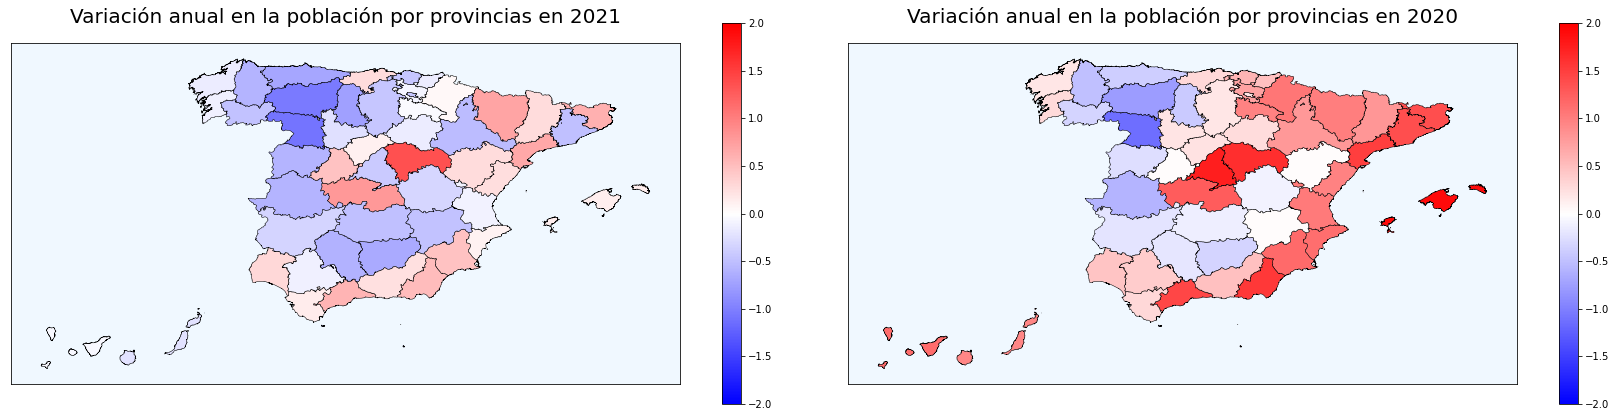

In [ ]:
# Creamos la figura, estableciendo que tendrá dos subfiguras al poner ax1 y ax2. 
fig, (ax1, ax2) = plt.subplots(nrows=1, #Número de filas
                              ncols=2, #Número de columnas
                              figsize=(30, 20)) #Tamaño de la figura

# Reducimos al máximo la separación entre las figuras
fig.subplots_adjust(wspace=0.0) 

# Creamos la primera figura (que irá a la izquierda):
ax1.set_xticks([]) # Quitamos los ticks del eje X
ax1.set_yticks([]) # Quitamos los ticks del eje Y
ax1.set_facecolor("aliceblue") #Establecemos un color de fondo
ax1.set_title("Variación anual en la población por provincias en 2021", 
              pad = 20, 
              fontdict={"fontsize":20}) # Tamaño de la fuente del título
# Creamos el primer mapa
mapa_inflacion.plot(ax=ax1, 
                column="Total",
                cmap="bwr",
                edgecolor="black",
                linewidth=0.5,
                legend=True,
                # Establecemos una leyenda
                legend_kwds={"orientation": "vertical", 
                             "shrink": 0.35}, # Para reducir el tamaño por defecto de la barra
                norm=plt.Normalize(vmin=-2, vmax=2)) # Para ajustar los valores de la leyenda
# Creamos el segundo mapa
ax2.set_xticks([])
ax2.set_yticks([])
ax2.set_facecolor("aliceblue")
ax2.set_title("Variación anual en la población por provincias en 2020", 
             pad = 20,
             fontdict={"fontsize":20}) 

mapa_inflacion2.plot(ax=ax2,
                column="Total", 
                cmap="bwr", 
                edgecolor="black",
                linewidth=0.5,
                legend=True,
                legend_kwds={"orientation": "vertical",
                             "shrink": 0.35},
                norm=plt.Normalize(vmin=-2, vmax=2));

# Guardamos y nos descargamos la figura en formato .png:
plt.savefig("Dos_Mapas_Provincias_VarPoblación2.png")
from google.colab import files
files.download("Dos_Mapas_Provincias_VarPoblación2.png")

###**Evolución de la población en España por provincias desde 1998 a 2021**
Ahora, en Periodo, seleccionamos todos los años que nos proporciona el INE y subimos el archivo que hemos llamado ***EvoVarPoblación***, con ello representaremos un GIF con la evolución de la variación poblacional en las provincias españolas entre 1998 y 2021.

En el cuaderno [*Cómo dibujar mapas en Python II Mapas dinámicos*](https://github.com/AlejandroDGR/Proyecto_Difusion_Universitarios_INE/blob/master/Esquemas_Python/C%C3%B3mo%20dibujar%20mapas%20en%20Python%20II%20Mapas%20din%C3%A1micos.ipynb) viene detallado como representar un GIF.


In [ ]:
# Importamos dos librerias para la realización del GIF
import PIL
import io

In [ ]:
from google.colab import files
uploaded = files.upload()
datos3=pd.read_csv("EvoVarPoblación.csv", sep=";", decimal=",", engine="python",  encoding="latin-1")

datos3["Codigo"] = datos3["Provincias"].str[:2]
datos3 = datos3[["Codigo", "Provincias", "Periodo", "Total"]]
datos3.head()

Saving EvoVarPoblación.csv to EvoVarPoblación.csv


,Codigo,Provincias,Periodo,Total
0,02,02 Albacete,2021,-0.47
1,02,02 Albacete,2020,0.03
2,02,02 Albacete,2019,-0.16
3,02,02 Albacete,2018,-0.32
4,02,02 Albacete,2017,-0.53


In [ ]:
# Creamos una columna para cada Periodo
datos_evolucion = datos3.pivot_table('Total', ['Codigo', 'Provincias'], 'Periodo')
datos_evolucion.reset_index( drop=False, inplace=True)

# Nos quedamos con las columnas más relevantes del dataframe con información geográfica
mapa_evolucion = mapa[["Codigo", "geometry"]] 
mapa_evolucion = pd.merge(mapa_evolucion, datos_evolucion) #Realizamos la unión, que se hará en base a las columnas Codigo
mapa_evolucion.head()

,Codigo,geometry,Provincias,1998,1999,2000,2001,2002,2003,2004,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
0,45,"POLYGON ((-5.40611 39.87773, -5.40618 39.87884...",45 Toledo,0.73,0.73,0.86,1.55,1.94,3.03,2.66,...,0.56,-0.68,-1.03,-0.82,-0.68,-0.27,0.08,1.08,1.28,0.80
1,44,"POLYGON ((0.14136 40.71821, 0.12382 40.72081, ...",44 Teruel,-0.99,0.01,-0.27,-0.18,0.81,0.98,0.47,...,-0.61,-1.07,-1.28,-1.02,-1.41,-1.03,-0.73,-0.32,0.03,0.28
2,43,"MULTIPOLYGON (((0.70759 40.63522, 0.70732 40.6...",43 Tarragona,0.97,1.42,1.71,2.26,3.12,3.64,3.06,...,0.34,-0.49,-1.14,-0.73,-0.35,-0.08,0.53,1.10,1.50,0.68
3,42,"POLYGON ((-1.99369 41.57709, -1.99311 41.57646...",42 Soria,-1.35,-0.37,-0.37,0.44,0.19,-0.58,0.77,...,-0.74,-1.30,-1.15,-1.32,-1.06,-1.26,-0.34,0.04,0.28,-0.15
4,41,"POLYGON ((-5.94134 36.85192, -5.94659 36.85232...",41 Sevilla,0.56,0.62,0.55,0.72,0.65,1.37,0.54,...,0.52,0.16,-0.04,0.01,-0.09,-0.01,0.02,0.13,0.40,-0.12


Creamos un bucle que va a iterar unas 14 veces, por lo que es un proceso que va a tardar unos 2 min en completarse. 

In [ ]:
# Creamos la lista de fotogramas vacía:
fotogramas = []

# Creamos el bucle for que pasará por todos los elementos de la lista de columna empezando por el cuarto:
for fechas in mapa_evolucion.columns.to_list()[3:]:

    fig, ax = plt.subplots(1, 1, figsize=(15, 15))
    ax.axis([-15, 5, 34, 45]) 
 
    # Título y ejes:
    ax.set_title("Varición anual en la población por provincias en " + str(fechas) + " (%)", 
                  pad = 20, 
                  fontdict={"fontsize":25}) 
    ax.set_xlabel("Longitud", fontsize=20)
    plt.xticks(fontsize=15)
    ax.set_ylabel("Latitud", fontsize=20)
    plt.yticks(fontsize=15)
    plt.grid(True, zorder=0)

    # Eliminar ejes
    ax.set_axis_off()

    # Leyenda
    from mpl_toolkits.axes_grid1 import make_axes_locatable
    divider = make_axes_locatable(ax)
    cax = divider.append_axes("right",
                              size="5%",
                              pad=0.1) # Para separar la leyenda un poco del mapa

    # Dibujamos nuestro mapa de provincias:
    mapa_evolucion.plot(ax=ax,
               column=fechas,
               cmap="bwr",
               edgecolor="black",
               linewidth=0.2,
               legend=True,
               norm=plt.Normalize(vmin=-2, vmax=2), 
               cax=cax,
               zorder=5); 

    oceanos_file = r'https://github.com/AlejandroDGR/Proyecto_Difusion_Universitarios_INE/blob/master/mapas/oceanos.zip?raw=true'
    mapa_oceanos = gpd.read_file(oceanos_file)#.to_crs("EPSG:3395")
    mapa_oceanos.plot(ax=ax,
                    color="lightblue",
                    zorder=0);
 
    paises_file = r'https://github.com/AlejandroDGR/Proyecto_Difusion_Universitarios_INE/blob/master/mapas/paises.zip?raw=true'
    mapa_paises = gpd.read_file(paises_file)#.to_crs("EPSG:3395")
    mapa_paises.plot(ax=ax,
                   color="palegoldenrod",
                   edgecolor="black",
                   linewidth=0.2,
                   zorder=2); 
  
    # Creamos el GIF
    f = io.BytesIO() # Creamos un objeto que va a contener elementos binarios 
    imagen = ax.get_figure() # Vamos "capturando", uno a uno, los mapas que vamos creando
    imagen.savefig(f, # Guadamos la información de cada mapa
                   format="png", # Formato
                   bbox_inches="tight") 
    f.seek(0) 
    fotogramas.append(PIL.Image.open(f)) # con append() vamos añadiendo cada mapa a la lista de fotogramas


fotogramas[0].save("Mapa evolución de la población por provincias.gif", 
                   format="GIF", 
                   append_images = fotogramas[1:], 
                   save_all = True,
                   duration = 1200, # Duración en milisegundos del GIF
                   loop=0) # Para que vuelva a empezar el GIF

f.close() # Cerramos el archivo binario 

# Se mostraran todos los archivos png que hemos utilizado para formar el GIF, 
# como no los necesitamos, pulsamos en la parte izquierda y borramos los resultados mostrados (x)

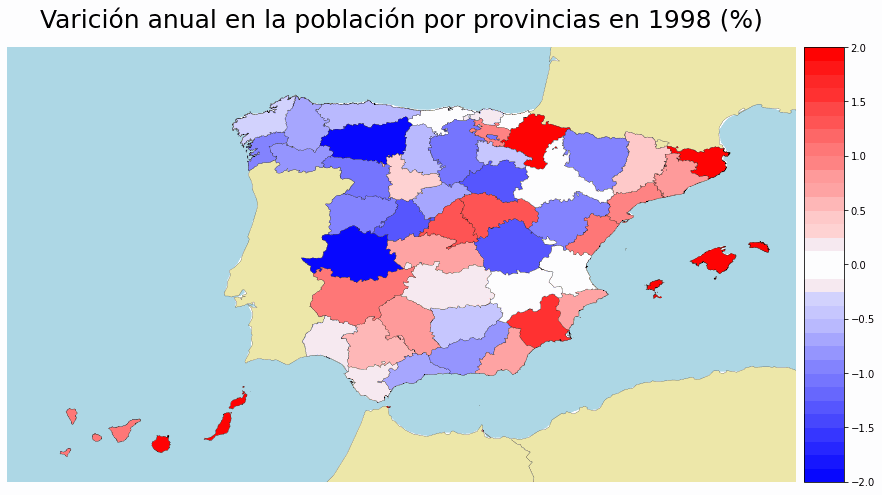

In [ ]:
# Leemos el GIF que hemos guardado anteriormente
from IPython.display import Image
from matplotlib import animation
Image(open("/content/Mapa evolución de la población por provincias.gif", "rb").read()) 

In [ ]:
# Para descargar el GIF
from google.colab import files
files.download("Mapa evolución de la población por provincias.gif") 

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>